# Cellular automata 

## 1. Introducción 

Un autómata celular es un modelo matemático para un sistema dinámico que evoluciona en pasos discretos. Es adecuado para modelar sistemas naturales o artificiales que puedan ser descritos como una colección de objetos simples que interactúan localmente unos con otros. Sus aplicaciones van desde el estudio de evolución de ecosistemas en biología, detección de fuegos en los bosques, simulación del tráfico en las ciudades, Inteligencia Artificial, etc.

Existen 3 etapas en la historia de los autómatas celulares:
- La primera alrededor de 1950 con **John von Neumann**, matemático que tuvo una participación decisiva en la construcción del primer ordenador (el ENIAC en 1946). 
- La segunda en 1970, cuando **John Horton Conway** dio a conocer el autómata celular que probablemente sea el más conocido: el Juego de la vida (Life), publicado por Martin Gardner en su columna Mathematical Games en la revista Scientific American.
- La tercera etapa llega a mediados de los años 80 con **Stephen Wolfram**, científico reconocido además por ser el autor del popular programa de ordenador Mathematica. 


## 2. Objetivos

### 2.1 Objetivo general

> Encontrar un algoritmo usando cellular automata para generación de fractales aleatorios.  

### 2.2 Objetivos específicos

> 
> 
> 
> 


## 3.  Modelo que representa el problema



Los automata celular que se utilizaron para modelar el problema son tambien llamados automata celulares elementales. Este nombre viene de que son la forma más simple de representar un automata celular. Las principales características de estos es qué:
* Tienen una dimensión espacial y una dimensión 'temporal' y se representan mediante una cuadrícula.
* El estado de cada punto de la cuadricula se representa mediante un 1 o un 0.
* El estado de cada punto se determina por el estado de el punto mismo y los puntos adyacentes en el paso temporal anterior.
* Existen $2^8$ reglas elementales formadas por la combinación de resultados que dependen de los estados de los 3 puntos anteriores (TTT, TTF, TFT, TFF, FFF, FFT, FTF, FTT, todos un posible resultado de 1 o 0)


## 4. Solución del problema


Para comenzar con el problema, se planteo una función que se le va a aplicar a todos los puntos de la cuadricula y les otorgue un valor en relaciòn a los valores de los puntos de la cuadricula anteriores. La regla que se utilizo para esta funciòn fue la 90 que es la que deberá generar el triangulo de sierpinski dadas las condiciones iniciales que se van a aplicar más adelante.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [26]:
def rule90(point1,point2,point3):
    if point1:
        if point2:       
            if point3:           #TTT
                puntoactual=False
            else:                     #TTF
                puntoactual=True
        else:
            if point3:          #TFT
                puntoactual=False
            else:                     #TFF
                puntoactual=True       
    else:
        if point2:
            if point3:          #FTT
                puntoactual=True
            else:                     #FTF
                puntoactual=False
        else:
            if point3:          #FFT
                puntoactual=True
            else:                     #FFF
                puntoactual=False
    return puntoactual

In [89]:
def paridad(filas, columnas, matriz):
    for i in range(0,F):
        if sum(G[i,:])%2==0:
            for j in range(1,C-1):
                G[i+1,j]=rule90(G[i,j-1],G[i,j],G[i,j+1])
        elif sum(G[i,:])%3==0:
            for j in range(1,C-1):
                G[i+1,j]=ruleX(G[i,j-1],G[i,j],G[i,j+1])
        else:
            for j in range(1,C-1):
                G[i+1,j]=ruleXX(G[i,j-1],G[i,j],G[i,j+1])
    return matriz

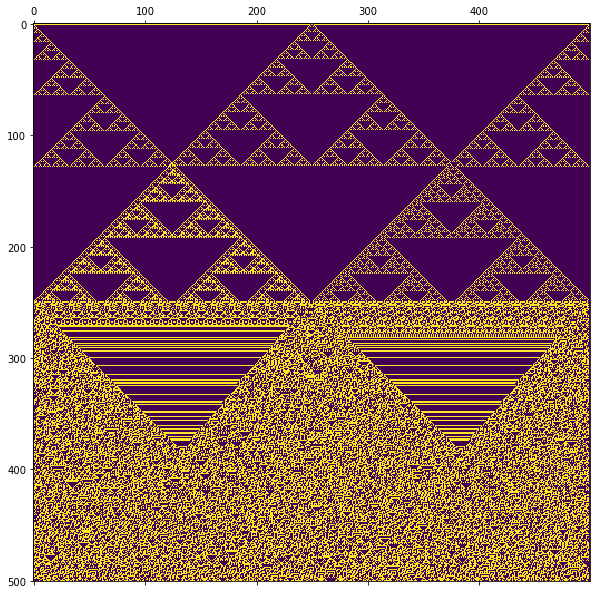

In [90]:
F=500
C=500
G=np.zeros((F+1,C),dtype=bool)
G[0,int(C/2)]=True
paridad(F,C,G)
fig=plt.figure(figsize=(10,10))
plt.matshow(G,fignum=1)

Con esto entonces ya se puede construir la cuadricula donde se va a aplicar la función. Para esto se define el tamaño de la cuadricula $F\,x\,C$ y se crea una matriz G con valores booleanos. Tambien se inicia la variable $puntoactual$.

Los valores de $F$ y $C$ pueden ser modificados libremente, siempre considerando que si son muy grandes la implementación de la función va a ser más lenta. Se recomienda que sea una matriz cuadrada, para una mejor vizualización.

In [51]:
F=100
C=100
puntoactual=False
G=np.zeros((F+1,C),dtype=bool)

Finalmente se definen las condiciones iniciales. Para el triangulo de Sierpiski se define un solo punto con valor True. Para que se genere de manera simetrica se coloca el punto a la mitad de $C$.

In [53]:
#Condiciones iniciales para el Triangulo de Sierpiski
G=np.zeros((F+1,C),dtype=bool)
G[0,int(C/2)]=True

Con esto, y dos loops $for$ se implementa la función y se crea una matriz de valores booleanos. Y con la función $matshow$ de la libreria $matplotlib$ se grafica el resultado. Se agrego una ultima linea que guarda la imágen creada para mejor visualización al utilizar cuadriculas muy grandes. Se puede ajustar la calidad de la imagen guardada con $dpi$. 

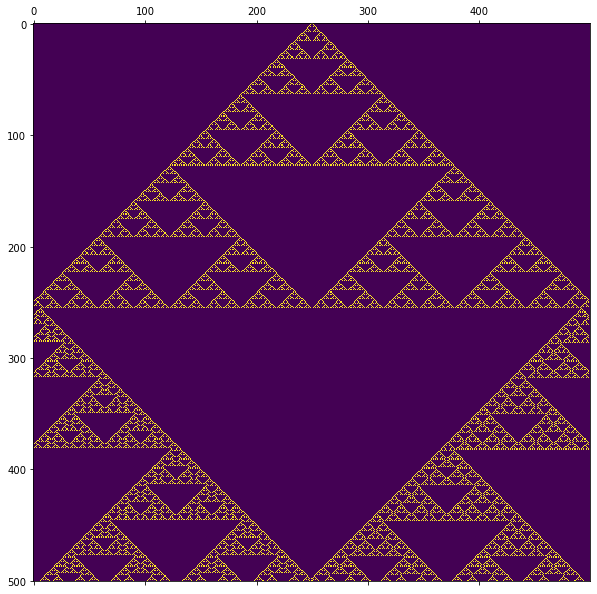

In [29]:
for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=rule90(G[i,j-1],G[i,j],G[i,j+1])
        
fig=plt.figure(figsize=(10,10))
plt.matshow(G,fignum=1)
# plt.savefig('CISimple1.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200, pero puede ser mas alto

2

## 5. Visualización de la solución del problema

### Regla 90

Una vez que se obtuvo esta imagen comenzamos a experimentar con la función $regla90$ y las condiciones iniciales para crear diferentes figuras y encontrar más fractales. 

Primero, se cambiaron las condiciones iniciales, utilizando la función $random.getrandbits(1)$ que otorga valores 1,0 y se convierten a booleano. También se puede utilizar $random.choice(True,False)$ pero es un poco más lento. Para apreciar mejor el resultado de estas condiciones iniciales es mejor correrlo con una cuadricula más pequeña.

Cada vez que se corre la celda se obtienen diferentes graficas, sin embargo se puede apreciar la tendencia de la regla a formar triangulos invertidos.

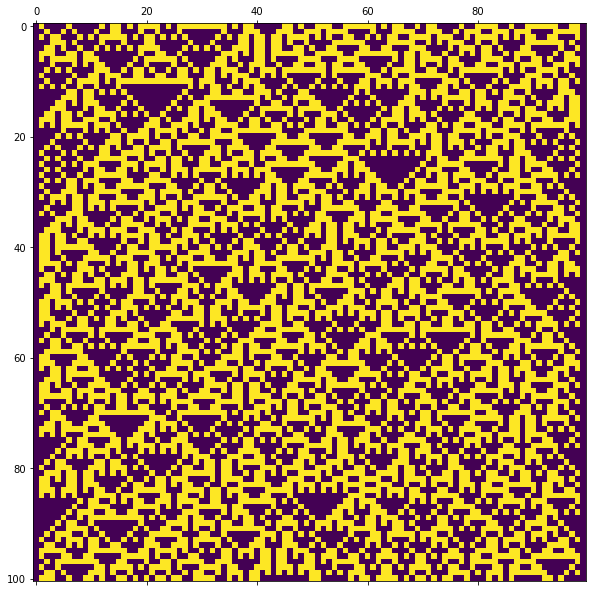

In [6]:
F=100
C=100
puntoactual=False
G=np.zeros((F+1,C),dtype=bool)

for i in range(C):
    G[0,i]=bool(random.getrandbits(1))#random.choice([True,False])

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=rule90(G[i,j-1],G[i,j],G[i,j+1])
        


fig=plt.figure(figsize=(10,10))
plt.matshow(G, fignum=1)
# plt.savefig('CIAleatorias1.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200.

Para otras condiciones iniciales definimos que ciertos puntos tuvieran valores $True$. Se graficaron en $subplots$ para reducir el espacio consumido por estas graficas pero, se pueden analizar más a detalle corriendolas individualmente comentando la primera parte de la celda que imprime las graficas y descomentando secciones individuales. Las condiciones estan definidas por fracciones del número de columnas entonces se puede ajustar este sin ningun problema. 

In [7]:
F=500
C=500

G=np.zeros((F+1,C),dtype=bool)
H=np.zeros((F+1,C),dtype=bool)
J=np.zeros((F+1,C),dtype=bool)
K=np.zeros((F+1,C),dtype=bool)

G[0,int(3*C/8)-1]=True
G[0,int(5*C/8)+1]=True

H[0,int(C/2)]=True
H[0,int(3*C/8)]=True
H[0,int(5*C/8)]=True

J[0,int(1*C/8)]=True
J[0,int(7*C/8)]=True

K[0,0]=True
K[0,C-1]=True
for i in range(int(C*7/16),int(C*9/16)):
    K[0,i]=bool(random.getrandbits(1))
K[0,int(7*C/16)]=True
K[0,int(9*C/16)]=True

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=rule90(G[i,j-1],G[i,j],G[i,j+1])
        H[i+1,j]=rule90(H[i,j-1],H[i,j],H[i,j+1])
        J[i+1,j]=rule90(J[i,j-1],J[i,j],J[i,j+1])
        K[i+1,j]=rule90(K[i,j-1],K[i,j],K[i,j+1])

Text(0.5, 1.05, 'Dos Puntos y una Sección Aleatoria')

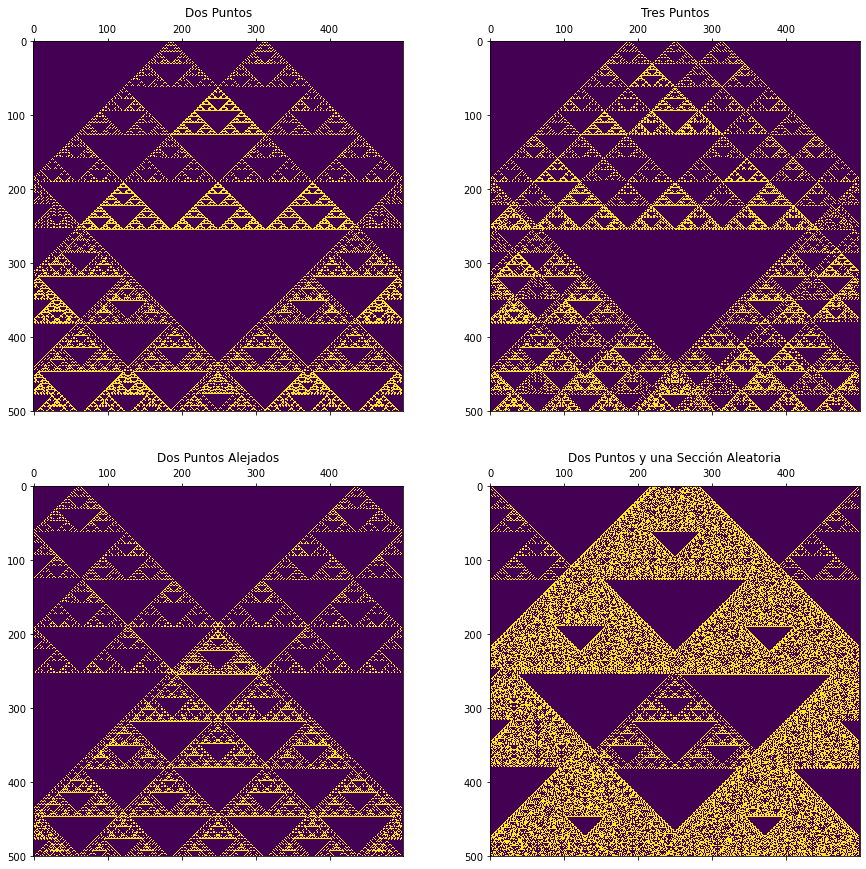

In [8]:
#-------------------------------------------------------------------
#Subplots
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].matshow(G)
axs[0, 0].set_title('Dos Puntos')
axs[0, 1].matshow(H)
axs[0, 1].set_title('Tres Puntos')
axs[1, 0].matshow(J)
axs[1, 0].set_title('Dos Puntos Alejados')
axs[1, 1].matshow(K)
axs[1, 1].set_title('Dos Puntos y una Sección Aleatoria')

#--------------------------------------------------------------------
##Dos Puntos
# fig=plt.figure(figsize=(10,10))
# plt.matshow(G, fignum=1)
#---------------------------------------------------------------------
##Tres Puntos
# fig=plt.figure(figsize=(10,10))
# plt.matshow(H, fignum=1)
#---------------------------------------------------------------------
##Dos Puntos alejados
# fig=plt.figure(figsize=(10,10))
# plt.matshow(J, fignum=1)
#---------------------------------------------------------------------
##Dos Puntos Alejados y Sección aleatoria
# fig=plt.figure(figsize=(10,10))
# plt.matshow(K, fignum=1)
# plt.savefig('CISelectivas1.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200.

Otras de las condiciones iniciales utilizadas que se nos ocurrio fue la 'espaciada'. Esta se obtiene poniendo valores True mediante un $for$ con la función modulo(%). Se utilizaron cuadriculas más pequeñas para apreciar mejor los resultados. Igual que en las condiciones iniciales anteriores se pueden correr individualmente cada una de las graficas para observar más detalles. El modulo 13 particularmente tiene una sorpresa escondida al correrlo con mejor definición...

In [9]:
F=300
C=300

G=np.zeros((F+1,C),dtype=bool)
H=np.zeros((F+1,C),dtype=bool)
J=np.zeros((F+1,C),dtype=bool)
K=np.zeros((F+1,C),dtype=bool)

for i in range(C):
    if i%3==0:
        G[0,i]=True        

for i in range(C):
    if i%5==0:
        H[0,i]=True
        
for i in range(C):
    if i%13==0:
        J[0,i]=True
        
for i in range(C):
    if i%30==0:
        K[0,i]=True

        
for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=rule90(G[i,j-1],G[i,j],G[i,j+1])
        H[i+1,j]=rule90(H[i,j-1],H[i,j],H[i,j+1])
        J[i+1,j]=rule90(J[i,j-1],J[i,j],J[i,j+1])
        K[i+1,j]=rule90(K[i,j-1],K[i,j],K[i,j+1])

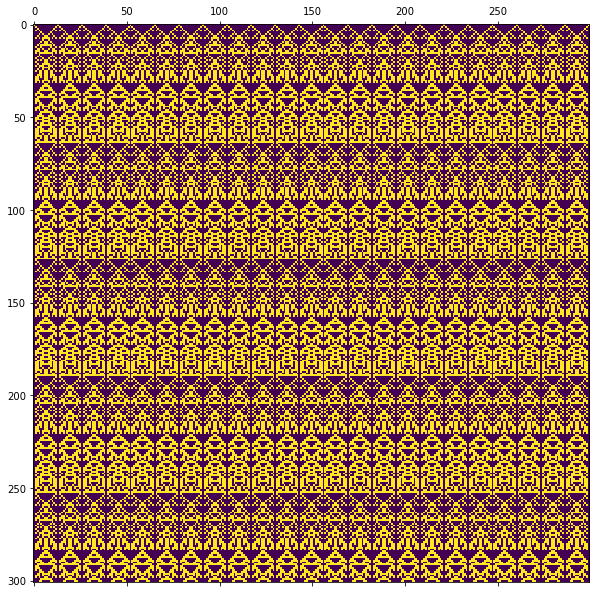

In [10]:
#---------------------------------------------------------------------
# #Subplots
# fig, axs = plt.subplots(2, 2,figsize=(15,15))
# axs[0, 0].matshow(G)
# axs[0, 0].set_title('Modulo 3')
# axs[0, 1].matshow(H)
# axs[0, 1].set_title('Modulo 5')
# axs[1, 0].matshow(J)
# axs[1, 0].set_title('Modulo 13')
# axs[1, 1].matshow(K)
# axs[1, 1].set_title('Modulo 27')
#---------------------------------------------------------------------
#Modulo 3
# fig=plt.figure(figsize=(10,10))
# plt.matshow(G, fignum=1)
#---------------------------------------------------------------------
#Modulo 5
# fig=plt.figure(figsize=(10,10))
# plt.matshow(H, fignum=1)
#---------------------------------------------------------------------
#Modulo 13
fig=plt.figure(figsize=(10,10))
plt.matshow(J, fignum=1)
#---------------------------------------------------------------------
#Modulo 27
# fig=plt.figure(figsize=(10,10))
# plt.matshow(K, fignum=1)
# plt.savefig('CIEspaciadas1.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200.

### Regla X
Stephen Wolfram dio nombre y número a todas las reglas, sin embargo por fines de experimentación, decidimos 'crear' reglas. Aunque estas tienen sus propios números, nosotros las encontramos por medio de prueba y error, cambiando los resultados de cada una de las condiciones de la función

In [11]:
def ruleX(point1,point2,point3): #(10010110)
    if point1:
        
        if point2:       
            if point3:           #TTT
                puntoactual=True
            else:                     #TTF
                puntoactual=False
        else:
            if point3:          #TFT
                puntoactual=False
            else:                     #TFF
                puntoactual=True
                
    else:
        if point2:
            if point3:          #FTT
                puntoactual=False
            else:                     #FTF
                puntoactual=True
        else:
            if point3:          #FFT
                puntoactual=True
            else:                     #FFF
                puntoactual=False
    return puntoactual

Condicion inicial de un valor Regla X

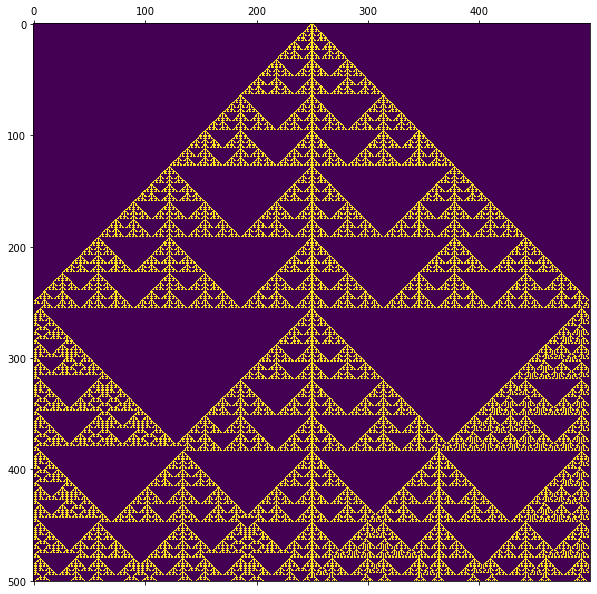

In [12]:
F=500
C=500
puntoactual=False
G=np.zeros((F+1,C),dtype=bool)
G[0,int(C/2)]=True

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleX(G[i,j-1],G[i,j],G[i,j+1])
        


fig=plt.figure(figsize=(10,10))
plt.matshow(G, fignum=1)
# plt.savefig('CISimple2.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200, pero puede ser mas alto

Condiciones iniciales aleatorias Regla X

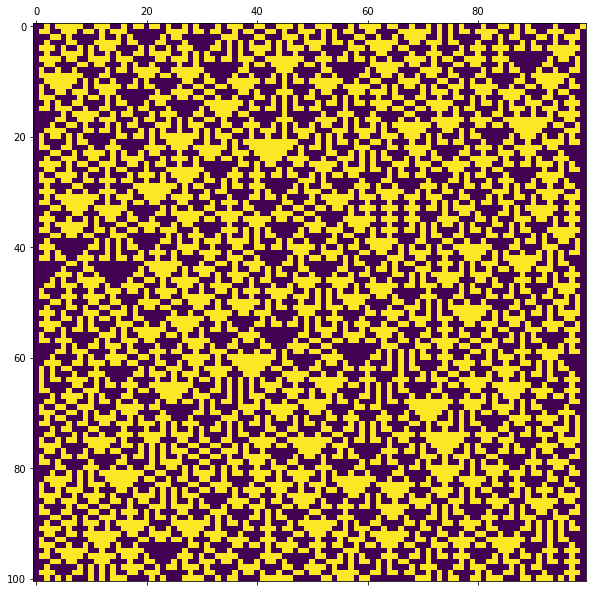

In [13]:
F=100
C=100
puntoactual=False
G=np.zeros((F+1,C),dtype=bool)

for i in range(C):
    G[0,i]=bool(random.getrandbits(1))#random.choice([True,False])

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleX(G[i,j-1],G[i,j],G[i,j+1])
        


fig=plt.figure(figsize=(10,10))
plt.matshow(G, fignum=1)
# plt.savefig('CIAleatorias2.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200.

Condiciones Iniciales Selectivas Regla X

In [14]:
F=500
C=500

G=np.zeros((F+1,C),dtype=bool)
H=np.zeros((F+1,C),dtype=bool)
J=np.zeros((F+1,C),dtype=bool)
K=np.zeros((F+1,C),dtype=bool)

G[0,int(3*C/8)-1]=True
G[0,int(5*C/8)+1]=True

H[0,int(C/2)]=True
H[0,int(3*C/8)]=True
H[0,int(5*C/8)]=True

J[0,int(1*C/8)]=True
J[0,int(7*C/8)]=True

K[0,0]=True
K[0,C-1]=True
for i in range(int(C*7/16),int(C*9/16)):
    K[0,i]=bool(random.getrandbits(1))
K[0,int(7*C/16)]=True
K[0,int(9*C/16)]=True

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleX(G[i,j-1],G[i,j],G[i,j+1])
        H[i+1,j]=ruleX(H[i,j-1],H[i,j],H[i,j+1])
        J[i+1,j]=ruleX(J[i,j-1],J[i,j],J[i,j+1])
        K[i+1,j]=ruleX(K[i,j-1],K[i,j],K[i,j+1])

Text(0.5, 1.05, 'Dos Puntos y una Sección Aleatoria')

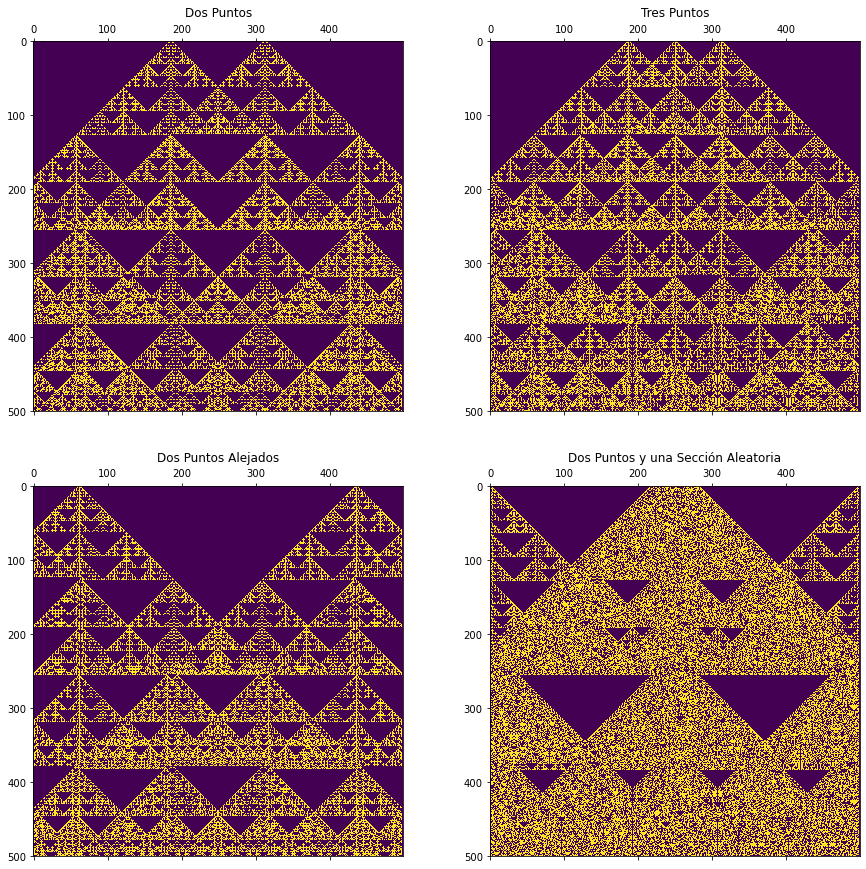

In [15]:
#-------------------------------------------------------------------
#Subplots
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].matshow(G)
axs[0, 0].set_title('Dos Puntos')
axs[0, 1].matshow(H)
axs[0, 1].set_title('Tres Puntos')
axs[1, 0].matshow(J)
axs[1, 0].set_title('Dos Puntos Alejados')
axs[1, 1].matshow(K)
axs[1, 1].set_title('Dos Puntos y una Sección Aleatoria')

#--------------------------------------------------------------------
##Dos Puntos
# fig=plt.figure(figsize=(10,10))
# plt.matshow(G, fignum=1)
#---------------------------------------------------------------------
##Tres Puntos
# fig=plt.figure(figsize=(10,10))
# plt.matshow(H, fignum=1)
#---------------------------------------------------------------------
##Dos Puntos alejados
# fig=plt.figure(figsize=(10,10))
# plt.matshow(J, fignum=1)
#---------------------------------------------------------------------
##Dos Puntos Alejados y Sección aleatoria
# fig=plt.figure(figsize=(10,10))
# plt.matshow(K, fignum=1)
# plt.savefig('CISelectivas2.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200, pero puede ser mas alto

Condiciones Iniciales Espaciadas Regla X

In [16]:
F=300
C=300

G=np.zeros((F+1,C),dtype=bool)
H=np.zeros((F+1,C),dtype=bool)
J=np.zeros((F+1,C),dtype=bool)
K=np.zeros((F+1,C),dtype=bool)

for i in range(C):
    if i%3==0:
        G[0,i]=True        

for i in range(C):
    if i%5==0:
        H[0,i]=True
        
for i in range(C):
    if i%13==0:
        J[0,i]=True
        
for i in range(C):
    if i%30==0:
        K[0,i]=True

        
for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleX(G[i,j-1],G[i,j],G[i,j+1])
        H[i+1,j]=ruleX(H[i,j-1],H[i,j],H[i,j+1])
        J[i+1,j]=ruleX(J[i,j-1],J[i,j],J[i,j+1])
        K[i+1,j]=ruleX(K[i,j-1],K[i,j],K[i,j+1])

Text(0.5, 1.05, 'Modulo 27')

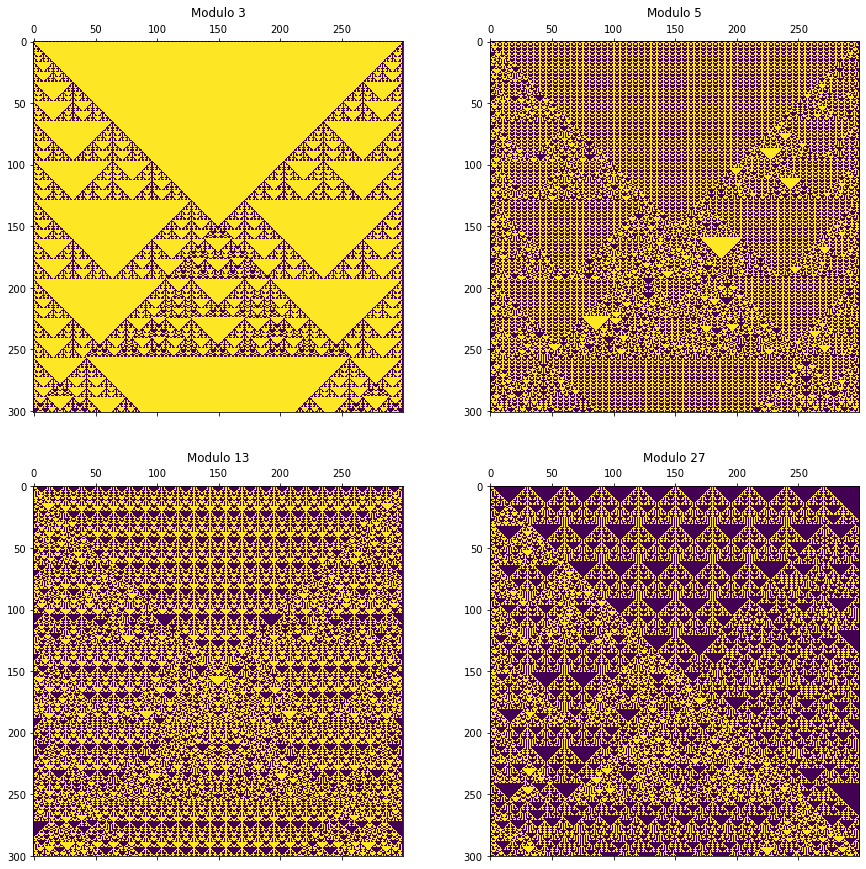

In [17]:
#---------------------------------------------------------------------
#Subplots
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].matshow(G)
axs[0, 0].set_title('Modulo 3')
axs[0, 1].matshow(H)
axs[0, 1].set_title('Modulo 5')
axs[1, 0].matshow(J)
axs[1, 0].set_title('Modulo 13')
axs[1, 1].matshow(K)
axs[1, 1].set_title('Modulo 27')
#---------------------------------------------------------------------
#Modulo 3
# fig=plt.figure(figsize=(10,10))
# plt.matshow(G, fignum=1)
#---------------------------------------------------------------------
#Modulo 5
# fig=plt.figure(figsize=(10,10))
# plt.matshow(H, fignum=1)
#---------------------------------------------------------------------
#Modulo 13
# fig=plt.figure(figsize=(10,10))
# plt.matshow(J, fignum=1)
#---------------------------------------------------------------------
#Modulo 27
# fig=plt.figure(figsize=(10,10))
# plt.matshow(K, fignum=1)
# plt.savefig('CIEspaciadas2.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200.

### Regla XX

In [3]:
def ruleXX(point1,point2,point3): #(00101101)
    if point1:
        
        if point2:       
            if point3:           #TTT
                puntoactual=False
            else:                     #TTF
                puntoactual=False
        else:
            if point3:          #TFT
                puntoactual=True
            else:                     #TFF
                puntoactual=False
                
    else:
        if point2:
            if point3:          #FTT
                puntoactual=True
            else:                     #FTF
                puntoactual=True
        else:
            if point3:          #FFT
                puntoactual=False
            else:                     #FFF
                puntoactual=True
    return puntoactual

Condicion inicial de un valor Regla XX

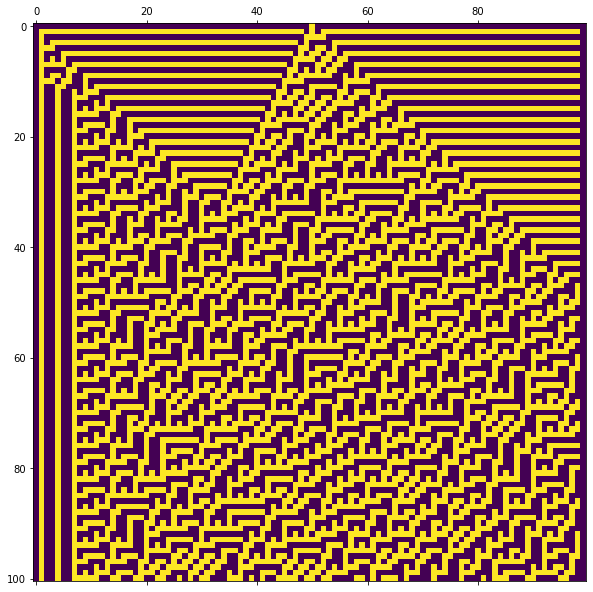

In [6]:
F=100
C=100
puntoactual=False
G=np.zeros((F+1,C),dtype=bool)
G[0,int(C/2)]=True

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleXX(G[i,j-1],G[i,j],G[i,j+1])
        


fig=plt.figure(figsize=(10,10))
plt.matshow(G, fignum=1)
# plt.savefig('CISimple3.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200, pero puede ser mas alto

Condiciones Aleatorias Regla XX

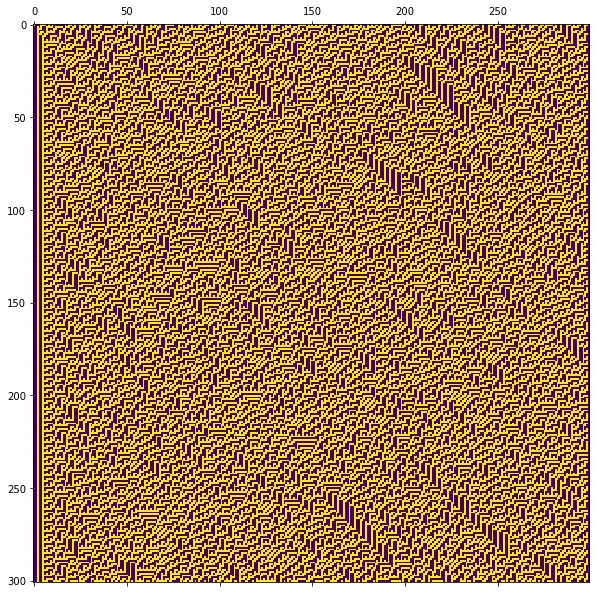

In [20]:
F=300
C=300
puntoactual=False
G=np.zeros((F+1,C),dtype=bool)

for i in range(C):
    G[0,i]=bool(random.getrandbits(1))#random.choice([True,False])

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleXX(G[i,j-1],G[i,j],G[i,j+1])
        


fig=plt.figure(figsize=(10,10))
plt.matshow(G, fignum=1)
# plt.savefig('CIAleatorias3.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200.

Condiciones Selectivas Regla XX

In [21]:
F=500
C=500

G=np.zeros((F+1,C),dtype=bool)
H=np.zeros((F+1,C),dtype=bool)
J=np.zeros((F+1,C),dtype=bool)
K=np.zeros((F+1,C),dtype=bool)

G[0,int(3*C/8)-1]=True
G[0,int(5*C/8)+1]=True

H[0,int(C/2)]=True
H[0,int(3*C/8)]=True
H[0,int(5*C/8)]=True

J[0,int(1*C/8)]=True
J[0,int(7*C/8)]=True

K[0,0]=True
K[0,C-1]=True
for i in range(int(C*7/16),int(C*9/16)):
    K[0,i]=bool(random.getrandbits(1))
K[0,int(7*C/16)]=True
K[0,int(9*C/16)]=True

for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleXX(G[i,j-1],G[i,j],G[i,j+1])
        H[i+1,j]=ruleXX(H[i,j-1],H[i,j],H[i,j+1])
        J[i+1,j]=ruleXX(J[i,j-1],J[i,j],J[i,j+1])
        K[i+1,j]=ruleXX(K[i,j-1],K[i,j],K[i,j+1])

Text(0.5, 1.05, 'Dos Puntos y una Sección Aleatoria')

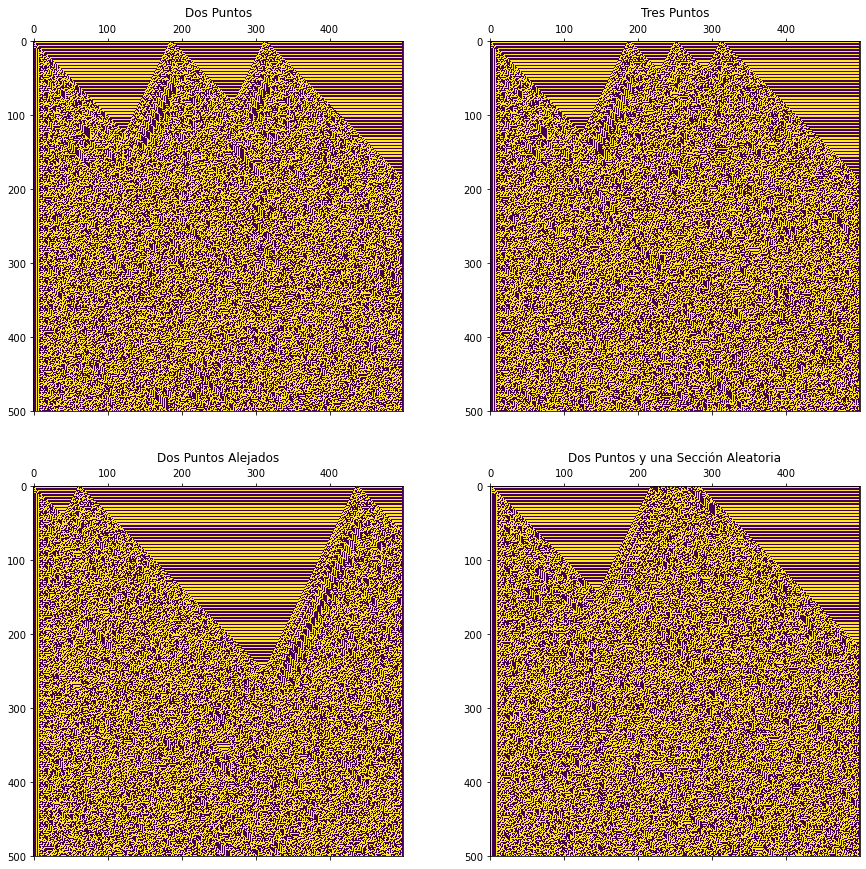

In [22]:
#-------------------------------------------------------------------
#Subplots
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].matshow(G)
axs[0, 0].set_title('Dos Puntos')
axs[0, 1].matshow(H)
axs[0, 1].set_title('Tres Puntos')
axs[1, 0].matshow(J)
axs[1, 0].set_title('Dos Puntos Alejados')
axs[1, 1].matshow(K)
axs[1, 1].set_title('Dos Puntos y una Sección Aleatoria')

#--------------------------------------------------------------------
##Dos Puntos
# fig=plt.figure(figsize=(10,10))
# plt.matshow(G, fignum=1)
#---------------------------------------------------------------------
##Tres Puntos
# fig=plt.figure(figsize=(10,10))
# plt.matshow(H, fignum=1)
#---------------------------------------------------------------------
##Dos Puntos alejados
# fig=plt.figure(figsize=(10,10))
# plt.matshow(J, fignum=1)
#---------------------------------------------------------------------
##Dos Puntos Alejados y Sección aleatoria
# fig=plt.figure(figsize=(10,10))
# plt.matshow(K, fignum=1)
# plt.savefig('CISelectivas3.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200, pero puede ser mas alto

Condiciones Espaciadas Regla XX

In [23]:
F=300
C=300

G=np.zeros((F+1,C),dtype=bool)
H=np.zeros((F+1,C),dtype=bool)
J=np.zeros((F+1,C),dtype=bool)
K=np.zeros((F+1,C),dtype=bool)

for i in range(C):
    if i%3==0:
        G[0,i]=True        

for i in range(C):
    if i%5==0:
        H[0,i]=True
        
for i in range(C):
    if i%13==0:
        J[0,i]=True
        
for i in range(C):
    if i%30==0:
        K[0,i]=True

        
for i in range(0,F):
    for j in range(1,C-1):
        G[i+1,j]=ruleXX(G[i,j-1],G[i,j],G[i,j+1])
        H[i+1,j]=ruleXX(H[i,j-1],H[i,j],H[i,j+1])
        J[i+1,j]=ruleXX(J[i,j-1],J[i,j],J[i,j+1])
        K[i+1,j]=ruleXX(K[i,j-1],K[i,j],K[i,j+1])

Text(0.5, 1.05, 'Modulo 27')

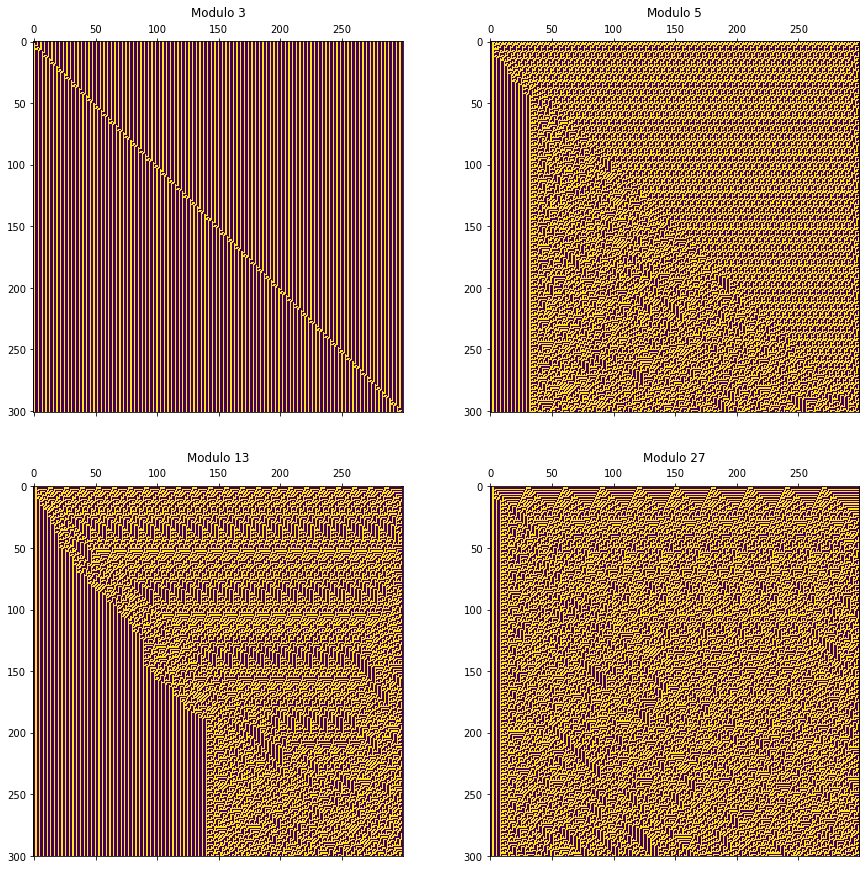

In [24]:
#---------------------------------------------------------------------
#Subplots
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].matshow(G)
axs[0, 0].set_title('Modulo 3')
axs[0, 1].matshow(H)
axs[0, 1].set_title('Modulo 5')
axs[1, 0].matshow(J)
axs[1, 0].set_title('Modulo 13')
axs[1, 1].matshow(K)
axs[1, 1].set_title('Modulo 27')
#---------------------------------------------------------------------
#Modulo 3
# fig=plt.figure(figsize=(10,10))
# plt.matshow(G, fignum=1)
#---------------------------------------------------------------------
#Modulo 5
# fig=plt.figure(figsize=(10,10))
# plt.matshow(H, fignum=1)
#---------------------------------------------------------------------
#Modulo 13
# fig=plt.figure(figsize=(10,10))
# plt.matshow(J, fignum=1)
#---------------------------------------------------------------------
#Modulo 27
# fig=plt.figure(figsize=(10,10))
# plt.matshow(K, fignum=1)

# plt.savefig('CIEspaciadas3.jpg',dpi=80) #Guarda la imagen 3000x3000 pixeles al dpi=200.

## 6. Conclusiones


## 7. Referencias

Cano, A., Rojas, A. (2016) *Autómatas celulares y aplicaciones.* Unió. Consultado el 13/11/2020 de https://plus.maths.org/content/sites/plus.maths.org/files/articles/2019/budd/rule_90.png